# 1. Regression

Cho dữ liệu insurance.csv, tham khảo tại:
https://www.kaggle.com/code/surajpatekar/gradientboostingmodel-insurance/data
- Đọc dữ liệu theo định dạng sau:

id (tự động sinh ra)    age     sex     bmi     children    smoker  region  charges
- Yêu cầu : Chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc dự đoán charges (chi phí y tế cá nhân do bảo hiểm y tế thanh toán). Lưu ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu, EDA, lựa chọn model, dự báo, vẽ biểu đồ, nhận xét, đến báo cáo kết quả.

## Phần 1 : Đọc tập tin dữ liệu

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.stats import pearsonr
from ydata_profiling import ProfileReport
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:.2f}'.format

### 1.1. Đọc tập tin dữ liệu :

In [3]:
df = pd.read_csv('Data/insurance.csv')

### 1.2. Xem thông tin sơ bộ : shape/head/tail/info

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94
1337,61,female,29.07,0,yes,northwest,29141.36


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Có 7 biến: 4 biến số, 3 biến phân loại(sex, smoker and region)
- Missing cells:	0
- Duplicate rows	1(0.1%)
- correlatation: 
age is highly overall correlated with charges;
charges is highly overall correlated with age and 1 other fields;
smoker is highly overall correlated with charges

### 1.3. Chỉ ra các biến input và biến output

- Output: 'charges'
- Input: <> 'charges'

In [9]:
bien_input = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [10]:
i = 1
for col in df.columns:
    print(i, '/', col, '\t', len(df[col].unique()), ':', df[col].unique())
    i = i+1

1 / age 	 47 : [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
2 / sex 	 2 : ['female' 'male']
3 / bmi 	 548 : [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.9

In [11]:
num_cols = ['age','bmi', 'children']
list_nums = ', '.join(num_cols)

In [12]:
cat_cols = list(set(df[bien_input].columns) - set(num_cols))
list_cat = ', '.join(cat_cols)

In [13]:
print(f'Có {len(num_cols)} biến số input:', list_nums)
print(f'Có {len(cat_cols)} biến phân loại input:', list_cat)

Có 3 biến số input: age, bmi, children
Có 3 biến phân loại input: smoker, sex, region


### 1.4. Kiểm tra dữ liệu bị trùng và xử lý

In [14]:
print('Số lượng dòng dữ liệu trùng:', df.duplicated().sum())


Số lượng dòng dữ liệu trùng: 1


In [15]:
print('Shape trước khi drop duplicates', df.shape)
df = df.drop_duplicates()
print('Shape sau khi drop duplicates', df.shape)

Shape trước khi drop duplicates (1338, 7)
Shape sau khi drop duplicates (1337, 7)


In [16]:
df = df.reset_index()

### 1.5. Kiểm tra dữ liệu bị thiếu và xử lý :

In [17]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Không có dữ liệu thiếu

## Phần 2 : Phân tích EDA

### 2.1. Phân tích 1 biến

In [18]:
from analysis.analyzer import TTTH_Analyzer as Analyzer

In [19]:
_analyzer = Analyzer()
sns.set()

Phân tích 1 biên - Biến output 'charges'

=====
central tendency of charges: {'mean': 13279.121486655948, 'median': 9386.1613, 'mode': 1121.8739, 'min': 1121.8739, 'max': 63770.42801, 'range': 62648.554110000005}
=====
Dispersion of charges: 
 {'range': 62648.554110000005, 'q1': 4746.344, 'q3': 16657.71745, 'iqr': 11911.37345, 'var': 146660811.0060086, 'skew': 1.5153909108403483, 'kurtosis': 1.6042206849514362}
=====


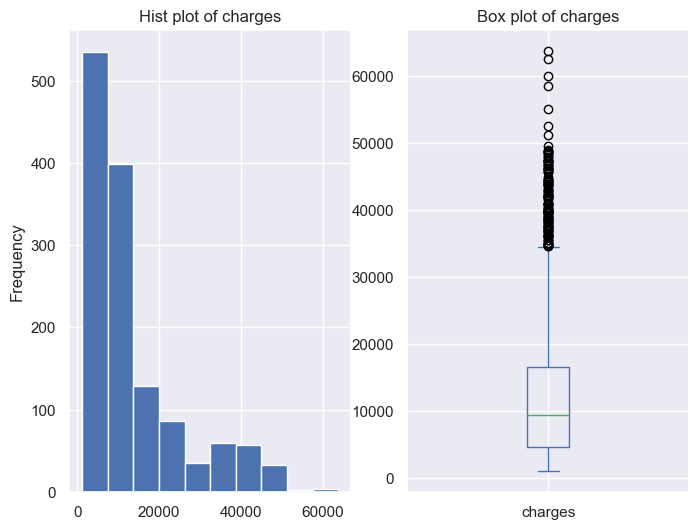

In [20]:
_analyzer.analyze_numeric_variable(variable_name='charges', df=df)

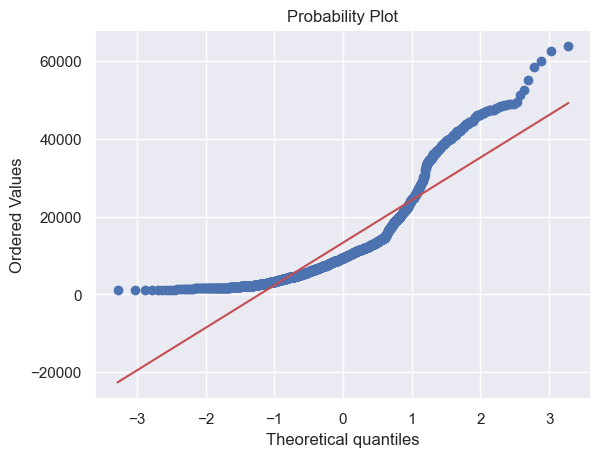

In [21]:
import pylab
stats.probplot(df['charges'],dist="norm",plot=pylab)
pylab.show()

In [22]:
from scipy.stats import shapiro
stat,p_value=shapiro(df['charges'])
print(" Coefficient =%.4f, P-value  =%.4f"%(stat,p_value))

 Coefficient =0.8148, P-value  =0.0000


#### Nhận xét:
- "charges" không tuân theo phân phối chuẩn, có phân phối lệch phải.
- "charges" có giá trị ngoại lệ (outlier)

Phân tích 1 biên - Biến phân loại

**************************************************
Phân tích biến smoker
Class count of smoker:

no     1063
yes     274
Name: smoker, dtype: int64


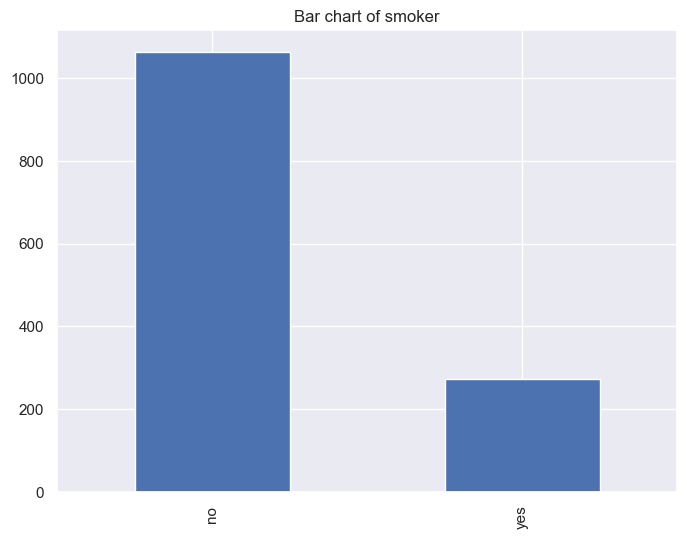

**************************************************
Phân tích biến sex
Class count of sex:

male      675
female    662
Name: sex, dtype: int64


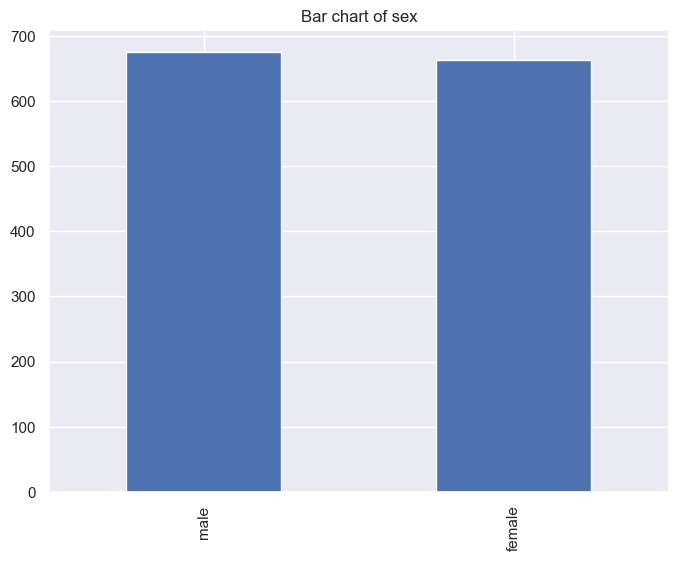

**************************************************
Phân tích biến region
Class count of region:

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


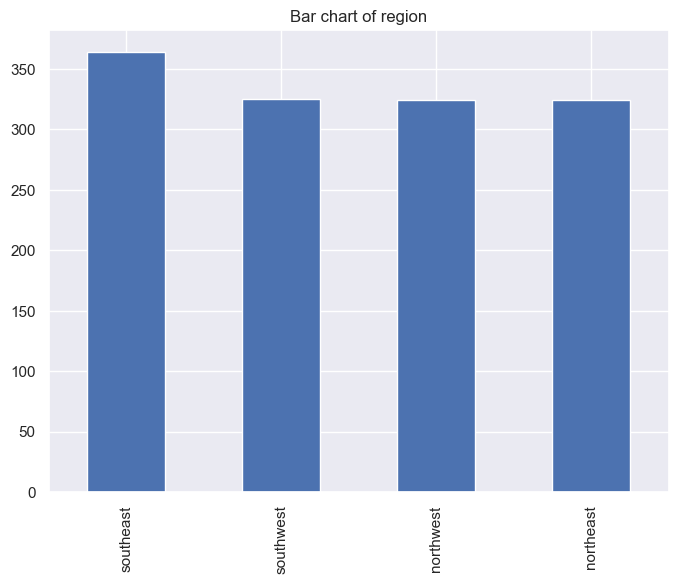

In [23]:
for col in cat_cols:
    print( '*' *50)
    print('Phân tích biến', col)
    _analyzer.analyze_category_variable(variable_name=col, df=df)   


### Nhận xét: 
Biến "smoker" có sự không cân bằng rõ rệt giữa lớp "hút thuốc" và "không hút thuốc," trong khi biến "sex" và "region" có phân phối gần cân bằng hơn. 

Phân tích 1 biên - Biến số

**************************************************
Phân tích biến age
=====
central tendency of age: {'mean': 39.222139117427076, 'median': 39.0, 'mode': 18, 'min': 18, 'max': 64, 'range': 46}
=====
Dispersion of age: 
 {'range': 46, 'q1': 27.0, 'q3': 51.0, 'iqr': 24.0, 'var': 197.2432819476977, 'skew': 0.054780773126998195, 'kurtosis': -1.244406407567826}
=====


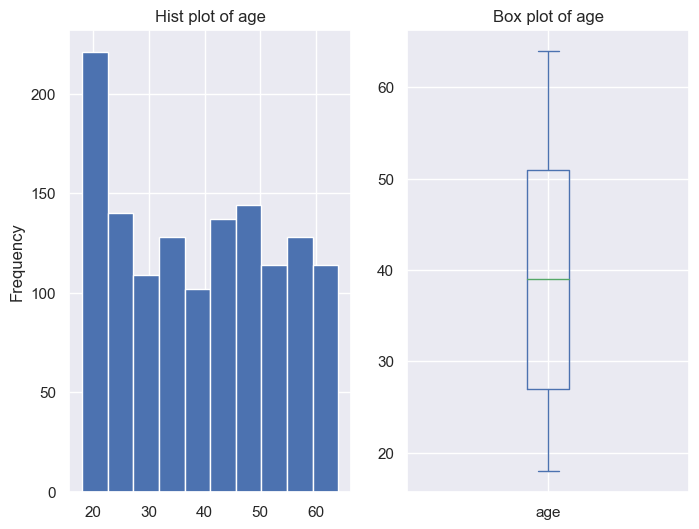

**************************************************
Phân tích biến bmi
=====
central tendency of bmi: {'mean': 30.66345175766642, 'median': 30.4, 'mode': 32.3, 'min': 15.96, 'max': 53.13, 'range': 37.17}
=====
Dispersion of bmi: 
 {'range': 37.17, 'q1': 26.29, 'q3': 34.7, 'iqr': 8.410000000000004, 'var': 37.215714816720336, 'skew': 0.28391419385321137, 'kurtosis': -0.052947204436257334}
=====


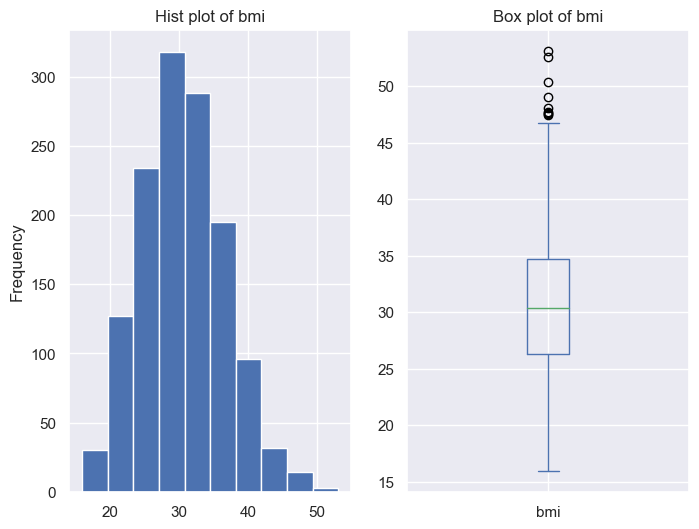

**************************************************
Phân tích biến children
=====
central tendency of children: {'mean': 1.0957367240089753, 'median': 1.0, 'mode': 0, 'min': 0, 'max': 5, 'range': 5}
=====
Dispersion of children: 
 {'range': 5, 'q1': 0.0, 'q3': 2.0, 'iqr': 2.0, 'var': 1.4534024695560264, 'skew': 0.9374206440474123, 'kurtosis': 0.20095444040352417}
=====


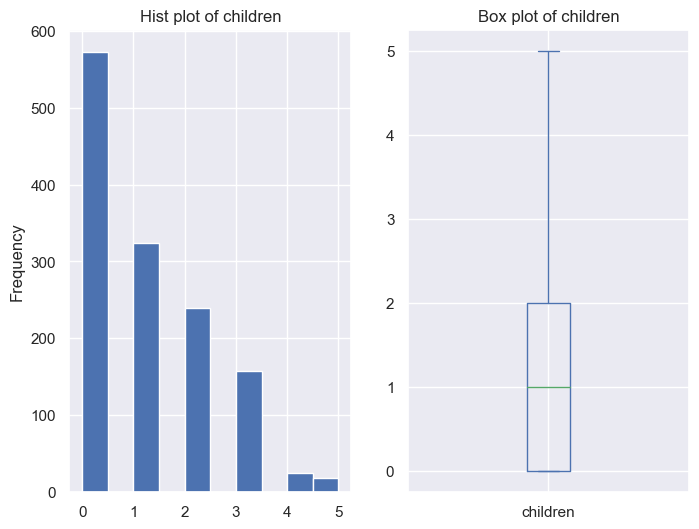

In [24]:
for col in num_cols:
    print( '*' *50)
    print('Phân tích biến', col)
    _analyzer.analyze_numeric_variable(variable_name=col, df=df)


In [25]:
def describe_dataframe(df):
    # Tạo một DataFrame mới để lưu trữ kết quả, cột là các biến và index là các thống kê mô tả
    result_df = pd.DataFrame(index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'dtype', 'Mode', 'Range', 'IQR', 'var', 'std', 'Skew', 'Kurtosis'])

    for column in df.columns:
        # Tính các thống kê cơ bản
        count = df[column].count()
        mean = df[column].mean()
        std = df[column].std()
        min_val = df[column].min()
        q25 = df[column].quantile(0.25)
        median = df[column].median()
        q75 = df[column].quantile(0.75)
        max_val = df[column].max()
        dtype = df[column].dtype

        # Tìm Mode
        mode = df[column].mode().values[0]

        # Tính Range và IQR
        data_range = max_val - min_val
        iqr = q75 - q25

        # Tính phương sai và độ lệch chuẩn
        var = df[column].var()
        skewness = stats.skew(df[column])
        kurtosis = stats.kurtosis(df[column])

        # Thêm các giá trị vào DataFrame kết quả
        result_df[column] = [count, mean, std, min_val, q25, median, q75, max_val, dtype, mode, data_range, iqr, var, std, skewness, kurtosis]

    return result_df

result_df = describe_dataframe(df[num_cols])
result_df

,age,bmi,children
count,1337,1337,1337
mean,39.22,30.66,1.10
std,14.04,6.10,1.21
min,18,15.96,0
25%,27.00,26.29,0.00
50%,39.00,30.40,1.00
75%,51.00,34.70,2.00
max,64,53.13,5
dtype,int64,float64,int64
Mode,18,32.30,0


#### Nhận xét:

- Dữ liệu về "age" và "bmi" có độ biến động lớn hơn so với "children."
- Phân phối của "age" và "bmi" gần với phân phối chuẩn, có độ lệch và độ nhọn gần với 0.
- Biến "children" có phân phối lệch phải, có độ lệch dương và độ nhọn dương nhẹ.

### 2.2. Phân tích 2 biến (cho nhận xét)

Biến số và biến số

In [26]:
# inputs

In [27]:
num_corr = df[num_cols].corr()
num_corr

,age,bmi,children
age,1.00,0.11,0.04
bmi,0.11,1.00,0.01
children,0.04,0.01,1.00


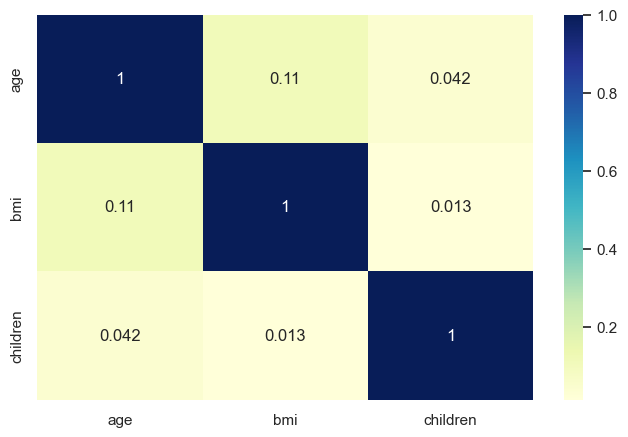

In [28]:
sns.set(rc = {'figure.figsize':(8,5)})
dataplot = sns.heatmap(num_corr,cmap="YlGnBu",annot=True);

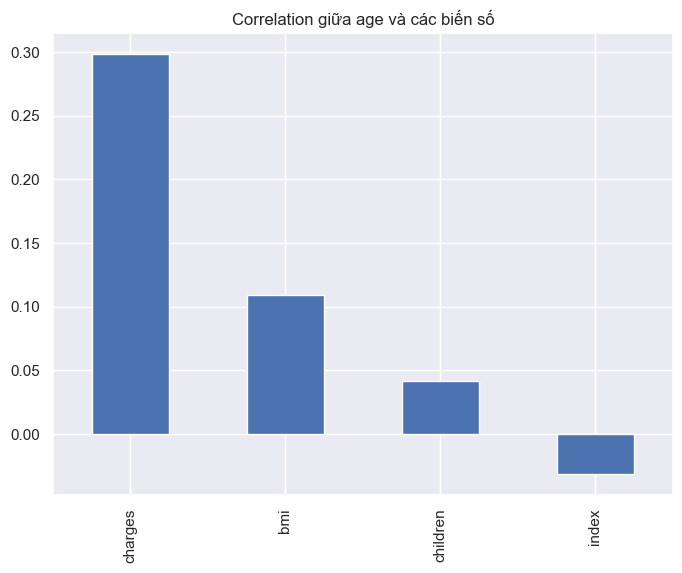

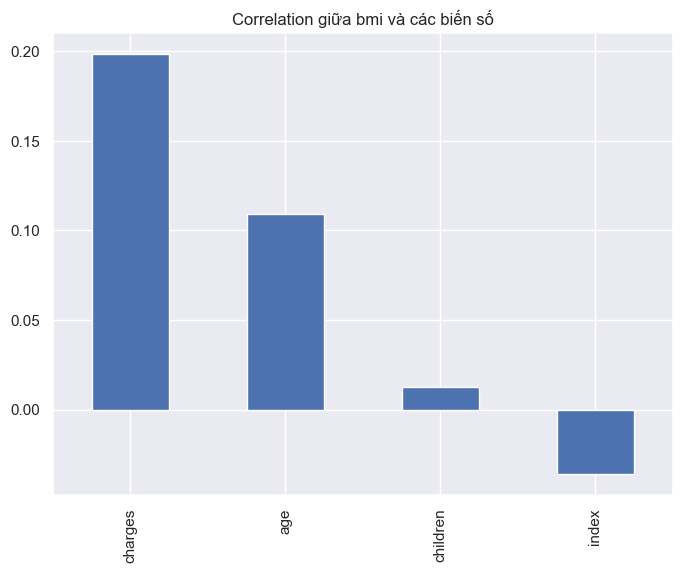

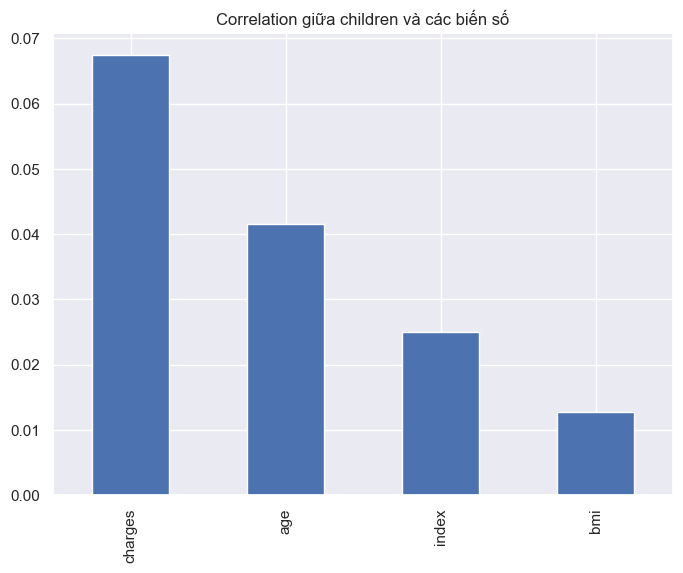

In [29]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    df.corr()[col].sort_values(ascending=False).drop(col).plot.bar()
    plt.title(f'Correlation giữa {col} và các biến số')
    plt.show();


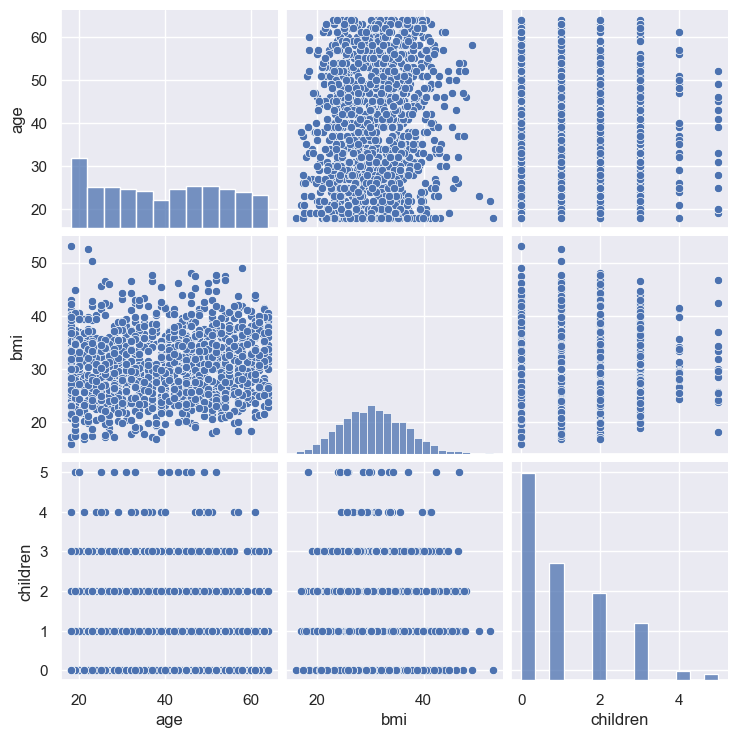

In [30]:
sns.pairplot(df[num_cols])
plt.show();

#### nhận xét:
- Các biến "age," "bmi," và "children" có tương quan rất yếu hoặc không có tương quan đáng kể với nhau. Điều này có nghĩa rằng tuổi, chỉ số khối cơ thể và số lượng con cái không có mối tương quan mạnh với nhau trong tập dữ liệu này.

**************************************************
Phân tích 2 biến giữa biến số age và output charges
Corr:           age  charges
age     1.00     0.30
charges 0.30     1.00


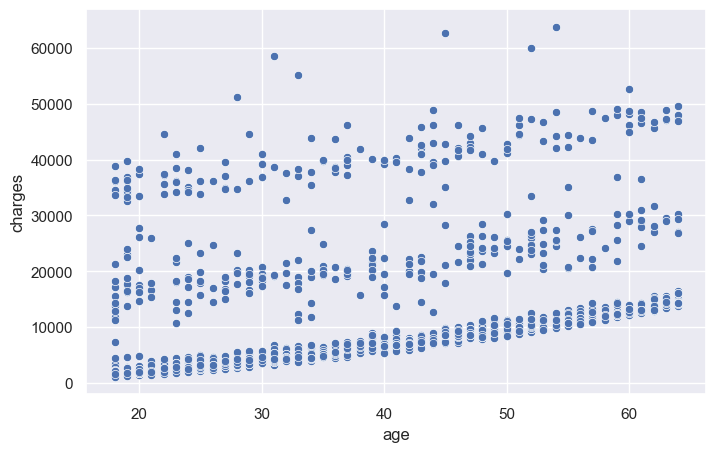

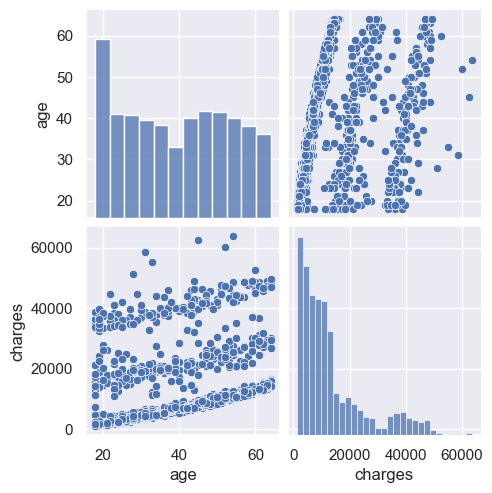

**************************************************
Phân tích 2 biến giữa biến số bmi và output charges
Corr:           bmi  charges
bmi     1.00     0.20
charges 0.20     1.00


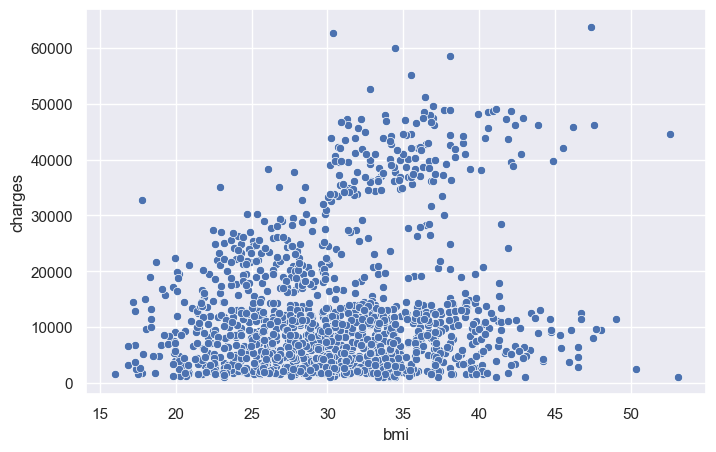

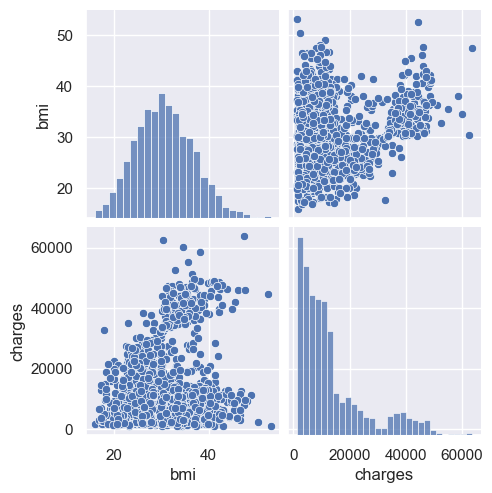

**************************************************
Phân tích 2 biến giữa biến số children và output charges
Corr:            children  charges
children      1.00     0.07
charges       0.07     1.00


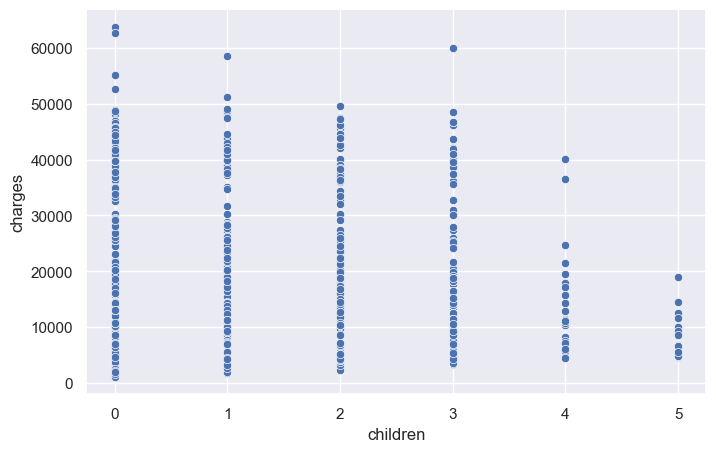

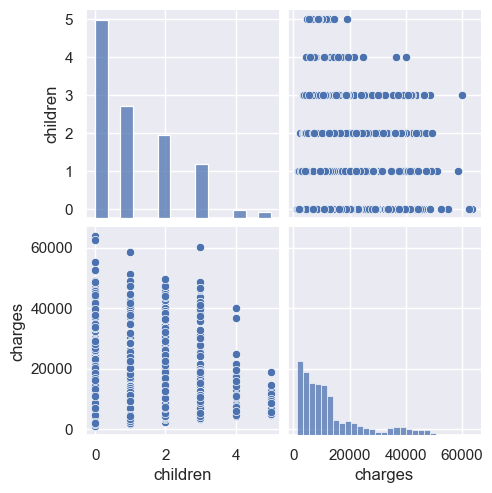

In [31]:
# - inputs + output
col2 = 'charges'
for i in range(0,len(num_cols)):
    col1 = num_cols[i]
    print( '*' *50)
    if col1 != col2:
        print('Phân tích 2 biến giữa biến số', col1, 'và output', col2)
        df = df.dropna(axis=0, subset=[col1, col2])
        print('Corr: ', df[[col1, col2]].corr())
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.show()
        sns.pairplot(df[[col1, col2]])
        plt.show();

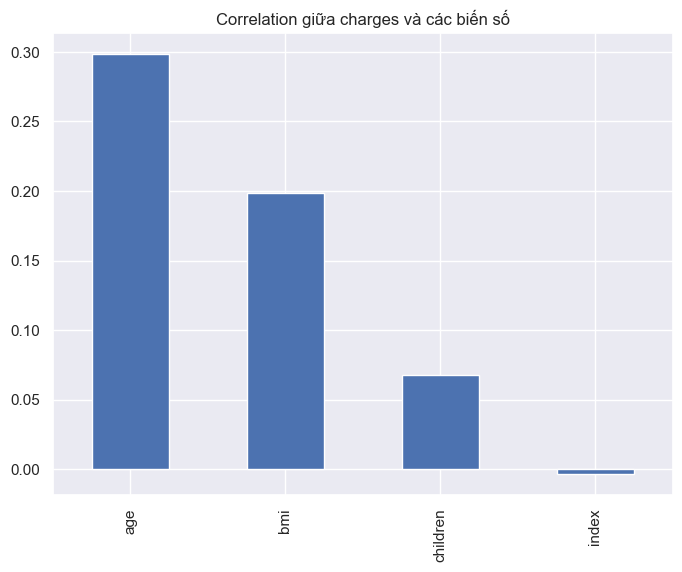

In [32]:
corr_with_charges = df.corr()["charges"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr_with_charges.drop("charges").plot.bar()
plt.title('Correlation giữa charges và các biến số')
plt.show();

In [33]:
corr_with_charges

charges     1.00
age         0.30
bmi         0.20
children    0.07
index      -0.00
Name: charges, dtype: float64

#### Nhận xét:
Với các biến  số:
- Tuổi (age) và chỉ số khối cơ thể (bmi) có tương quan tích cực với chi phí y tế (charges). Tức là, người có tuổi cao hơn hoặc chỉ số khối cơ thể cao hơn có thể có chi phí y tế cao hơn. Tuy nhiên, mối tương quan này không chắc chắn chỉ ra mối quan hệ nhân quả.

- Số lượng con cái (children) có một mối tương quan yếu hơn với chi phí y tế, và mối tương quan này có thể không quá quan trọng trong việc dự đoán chi phí y tế.

* biến phân loại và biến phân loại

In [34]:
# inputs

In [35]:
def lay_cac_cap(arr):
    pairs = []
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            pairs.append([arr[i], arr[j]])
    return pairs

In [36]:
cat_cols_pair_up = lay_cac_cap(cat_cols)

In [37]:
def analyze_cat_cat(f1, f2, df):
    _analyzer.analyze_category_vs_category(var1=f1, var2=f2, df=df)
    twoway_table = _analyzer.create_tw_table(var1=f1, var2=f2, df=df)
    print(twoway_table)
    _analyzer.use_chi_2_evaluation(twoway_table)


=====Analyze of smoker and sex=====


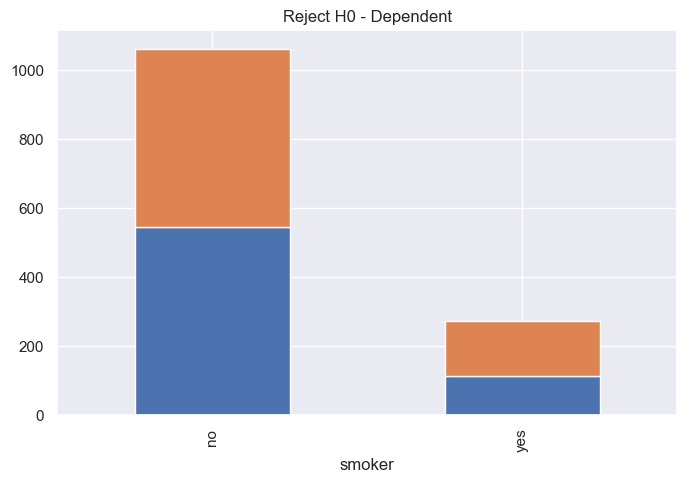

sex     female  male
smoker              
no         547   516
yes        115   159
=====Analyze of smoker and region=====


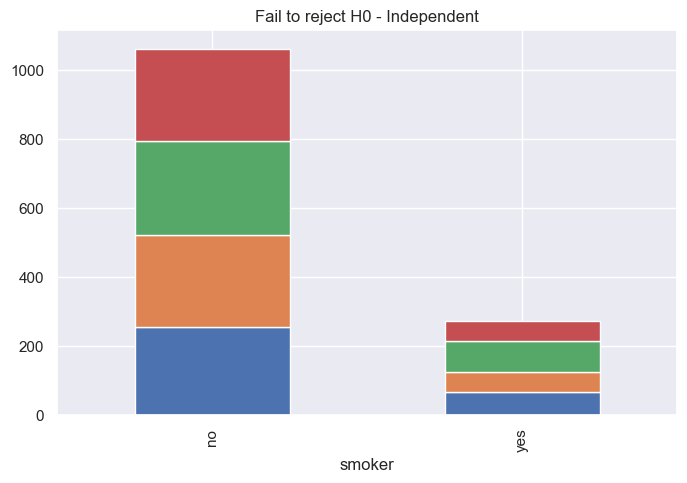

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        266        273        267
yes            67         58         91         58
=====Analyze of sex and region=====


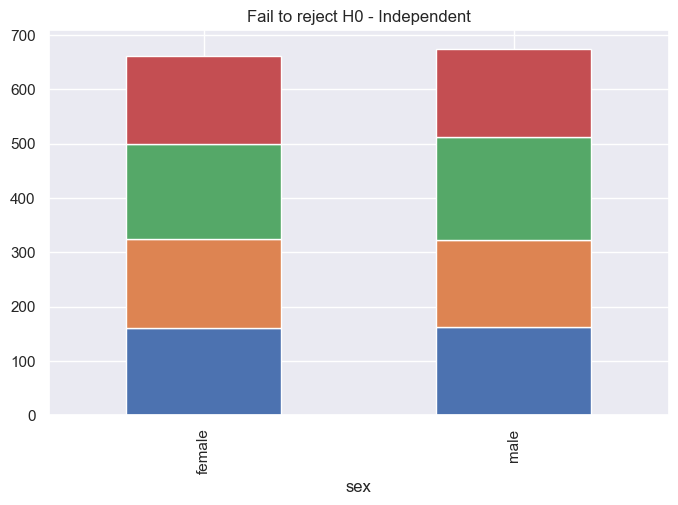

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        160        189        163


In [38]:
for pair in cat_cols_pair_up:
    a = pair[0]
    b = pair[1]
    analyze_cat_cat(a, b, df)

#### Nhận xét:
- có mối tương quan phụ thuộc giữa smoker và sex => giới tính có ảnh hưởng tới việc hút thuốc
- Không có mối quan hệ gì giữa smoker và region, sex và region

- biến số và biến phân loại

Phân tích 2 biến biến số age và biến phân loại
Variable age have no outlier
=====
Phân tích 2 biến giữa các biến :smoker và age
             sum_sq      df    F  PR(>F)
C(smoker)    172.52    1.00 0.87    0.35
Residual  263344.50 1335.00  NaN     NaN


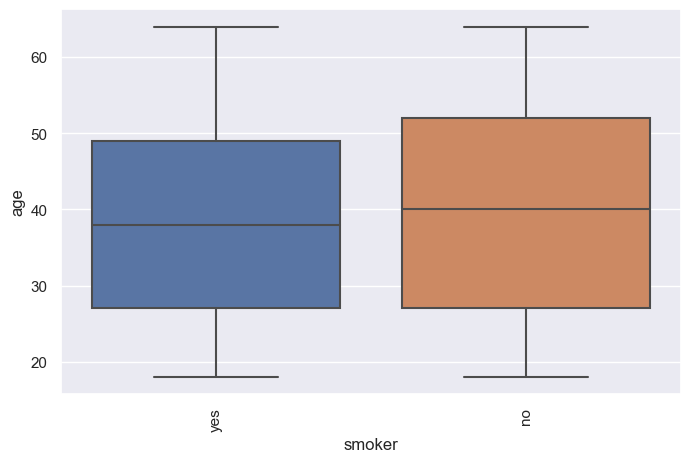

Class count of smoker:

no    0.80
yes   0.20
Name: smoker, dtype: float64
Ratio of 2 class is 3.88
You should consider to handle imbalance
=====
Phân tích 2 biến giữa các biến :sex và age
            sum_sq      df    F  PR(>F)
C(sex)      103.45    1.00 0.52    0.47
Residual 263413.57 1335.00  NaN     NaN


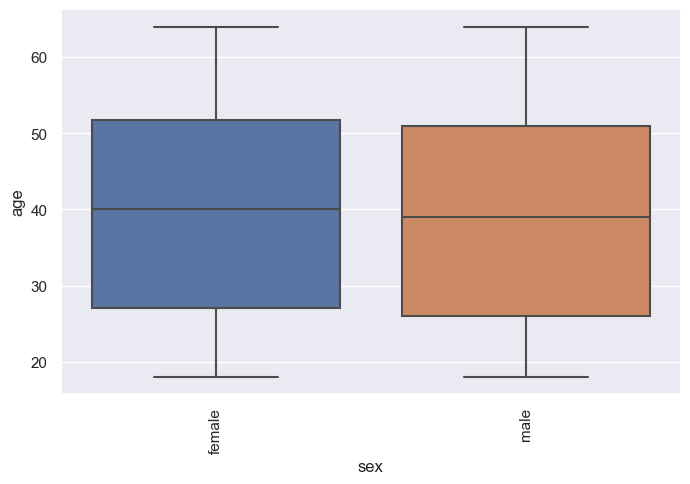

Class count of sex:

male     0.50
female   0.50
Name: sex, dtype: float64
Ratio of 2 class is 1.02
=====
Phân tích 2 biến giữa các biến :region và age
             sum_sq      df    F  PR(>F)
C(region)     47.89    3.00 0.08    0.97
Residual  263469.13 1333.00  NaN     NaN


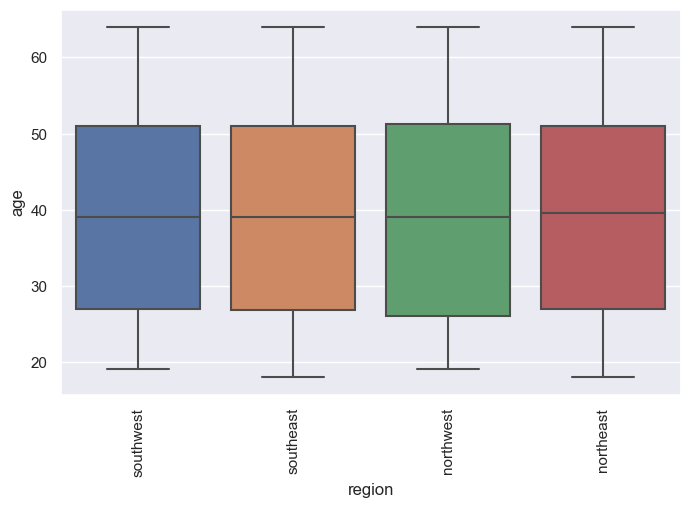

Class count of region:

southeast   0.27
southwest   0.24
northwest   0.24
northeast   0.24
Name: region, dtype: float64
Ratio of 2 class is 1.12
Phân tích 2 biến biến số bmi và biến phân loại
variable bmi have 0.673% upper outlier
variable bmi have 0.0% lower outlier
=====
Phân tích 2 biến giữa các biến :smoker và bmi
            sum_sq      df    F  PR(>F)
C(smoker)     0.70    1.00 0.02    0.89
Residual  49719.50 1335.00  NaN     NaN


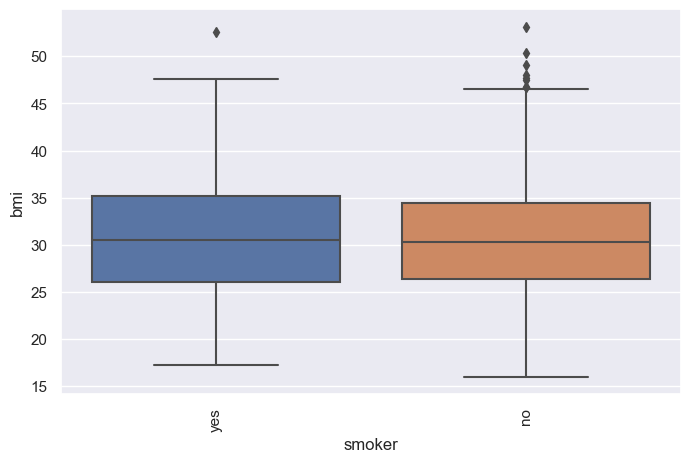

Class count of smoker:

no    0.80
yes   0.20
Name: smoker, dtype: float64
Ratio of 2 class is 3.88
You should consider to handle imbalance
=====
Phân tích 2 biến giữa các biến :sex và bmi
           sum_sq      df    F  PR(>F)
C(sex)     107.03    1.00 2.88    0.09
Residual 49613.16 1335.00  NaN     NaN


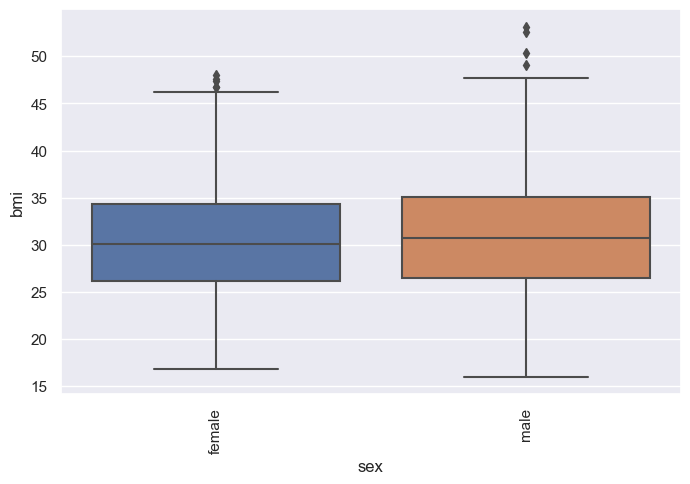

Class count of sex:

male     0.50
female   0.50
Name: sex, dtype: float64
Ratio of 2 class is 1.02
=====
Phân tích 2 biến giữa các biến :region và bmi
            sum_sq      df     F  PR(>F)
C(region)  4057.81    3.00 39.49    0.00
Residual  45662.38 1333.00   NaN     NaN


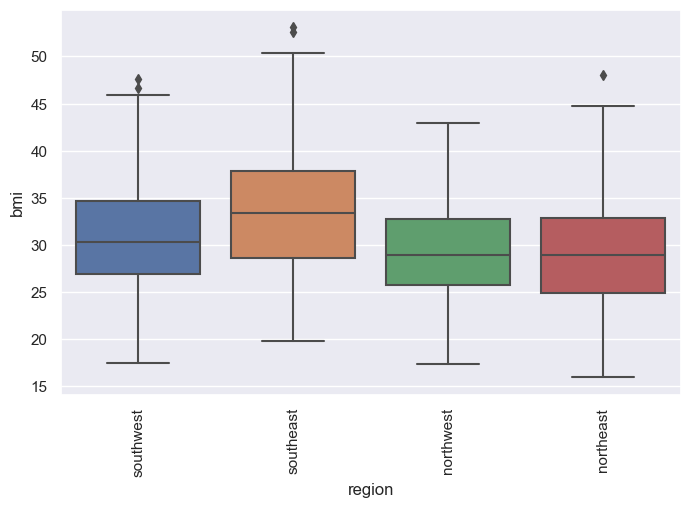

Class count of region:

southeast   0.27
southwest   0.24
northwest   0.24
northeast   0.24
Name: region, dtype: float64
Ratio of 2 class is 1.12
Phân tích 2 biến biến số children và biến phân loại
Variable children have no outlier
=====
Phân tích 2 biến giữa các biến :smoker và children
           sum_sq      df    F  PR(>F)
C(smoker)    0.10    1.00 0.07    0.79
Residual  1941.64 1335.00  NaN     NaN


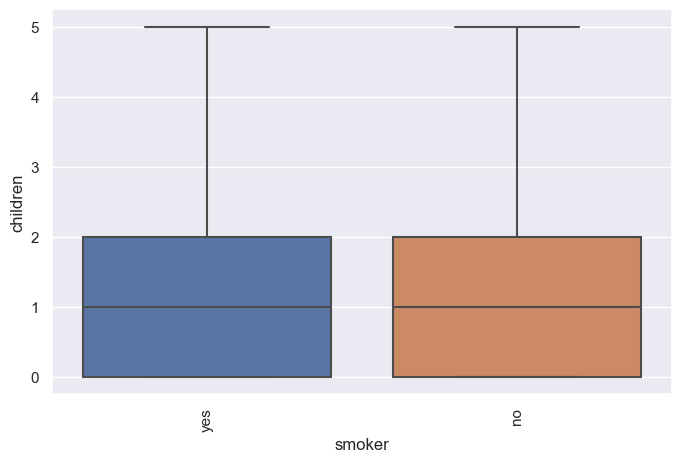

Class count of smoker:

no    0.80
yes   0.20
Name: smoker, dtype: float64
Ratio of 2 class is 3.88
You should consider to handle imbalance
=====
Phân tích 2 biến giữa các biến :sex và children
          sum_sq      df    F  PR(>F)
C(sex)      0.62    1.00 0.43    0.51
Residual 1941.13 1335.00  NaN     NaN


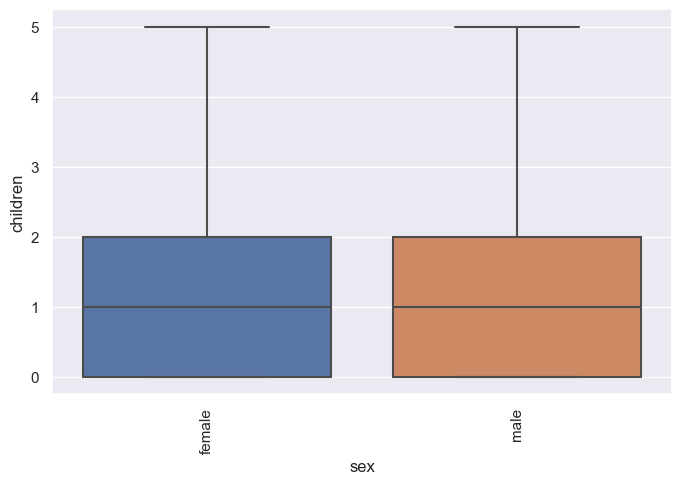

Class count of sex:

male     0.50
female   0.50
Name: sex, dtype: float64
Ratio of 2 class is 1.02
=====
Phân tích 2 biến giữa các biến :region và children
           sum_sq      df    F  PR(>F)
C(region)    3.25    3.00 0.75    0.53
Residual  1938.49 1333.00  NaN     NaN


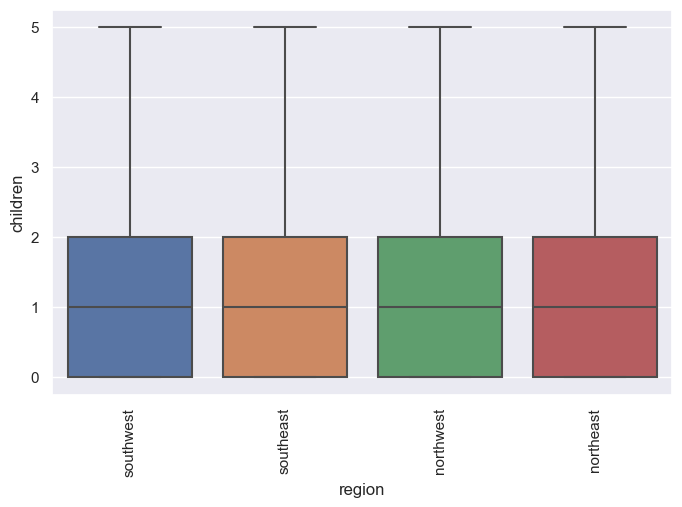

Class count of region:

southeast   0.27
southwest   0.24
northwest   0.24
northeast   0.24
Name: region, dtype: float64
Ratio of 2 class is 1.12


In [39]:
# giữa inputs
for num in num_cols:
    print('======================================================')
    print(f'Phân tích 2 biến biến số {num} và biến phân loại')
    _analyzer.check_outlier_of_numerical_variable(numerical_variable=num, df=df)
    for a in cat_cols:
        print('=====')
        print(f'Phân tích 2 biến giữa các biến :{a} và {num}')
        _analyzer.analyze_continous_vs_categories(continous_var=num, category_vars=a, df=df)
        _analyzer.check_imbalance_class(variable_name=a, df=df)

variable charges have 10.396% upper outlier
variable charges have 0.0% lower outlier
=====
Phân tích 2 biến giữa các biến :smoker và charges
                   sum_sq      df       F  PR(>F)
C(smoker) 121430737007.87    1.00 2175.74    0.00
Residual   74508106496.16 1335.00     NaN     NaN


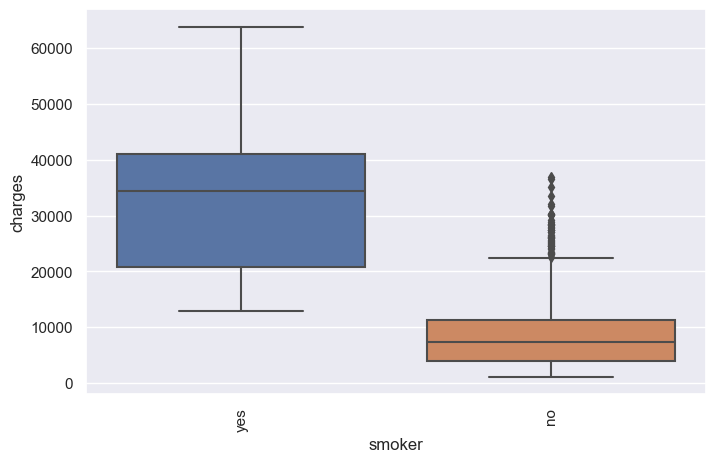

                   sum_sq      df       F  PR(>F)
C(smoker) 121430737007.87    1.00 2175.74    0.00
Residual   74508106496.16 1335.00     NaN     NaN
Class count of smoker:

no    0.80
yes   0.20
Name: smoker, dtype: float64
Ratio of 2 class is 3.88
You should consider to handle imbalance
=====
Phân tích 2 biến giữa các biến :sex và charges
                  sum_sq      df    F  PR(>F)
C(sex)      660149998.11    1.00 4.51    0.03
Residual 195278693505.92 1335.00  NaN     NaN


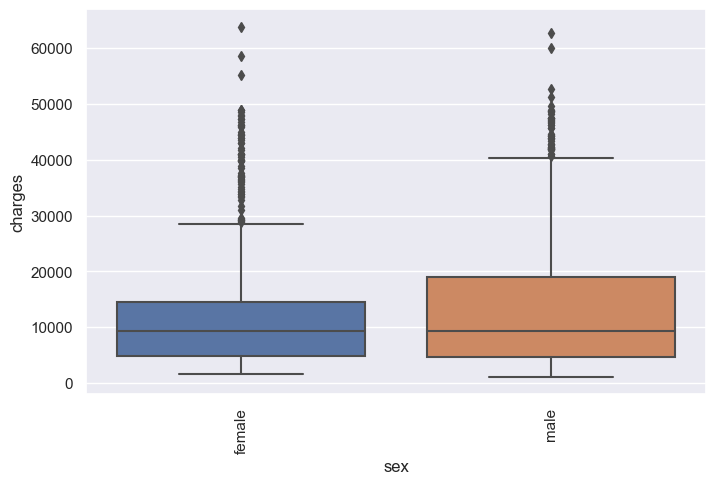

                  sum_sq      df    F  PR(>F)
C(sex)      660149998.11    1.00 4.51    0.03
Residual 195278693505.92 1335.00  NaN     NaN
Class count of sex:

male     0.50
female   0.50
Name: sex, dtype: float64
Ratio of 2 class is 1.02
=====
Phân tích 2 biến giữa các biến :region và charges
                   sum_sq      df    F  PR(>F)
C(region)   1281905701.19    3.00 2.93    0.03
Residual  194656937802.84 1333.00  NaN     NaN


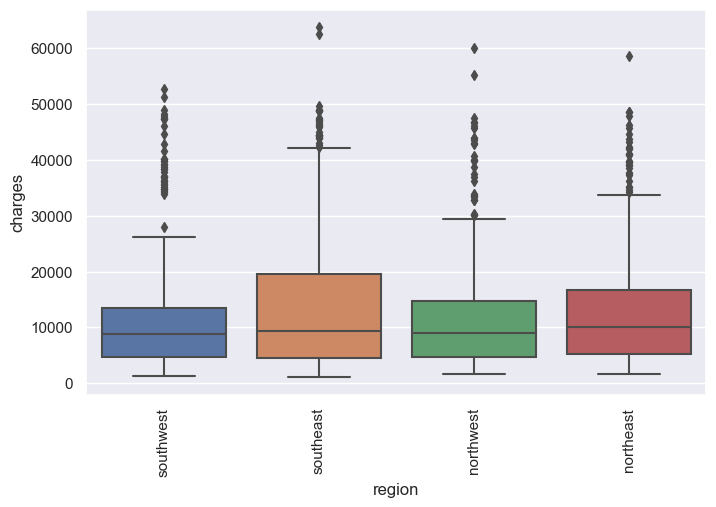

                   sum_sq      df    F  PR(>F)
C(region)   1281905701.19    3.00 2.93    0.03
Residual  194656937802.84 1333.00  NaN     NaN
Class count of region:

southeast   0.27
southwest   0.24
northwest   0.24
northeast   0.24
Name: region, dtype: float64
Ratio of 2 class is 1.12


In [40]:
# inputs + output
_analyzer.check_outlier_of_numerical_variable(numerical_variable='charges', df=df)
for cat in cat_cols:
    print('=====')
    print(f'Phân tích 2 biến giữa các biến :{cat} và charges')
    _analyzer.analyze_continous_vs_categories(continous_var='charges', category_vars=cat, df=df)
    _analyzer.analyze_anova_table_for_continous_vs_categories(continous_var='charges', category_vars=cat, df=df)
    _analyzer.check_imbalance_class(variable_name=cat, df=df)
    

#### Nhận xét:
- "sex" và "charges": Giới tính có ảnh hưởng đáng kể đến chi phí y tế với giá trị F-statistic là 4.51 và giá trị p-value là 0.03

- "smoker" và "charges": Việc hút thuốc có ảnh hưởng đáng kể đến chi phí y tế với giá trị F-statistic lớn (2175.74) và giá trị p-value thấp (0.00). Tuy nhiên, phân phối giữa những người hút thuốc (yes) và không hút thuốc (no) không cân bằng, với tỷ lệ số lượng là 3.88. Sự không cân bằng này cần được xem xét khi phân tích dữ liệu.

- "region" và "charges": Khu vực có ảnh hưởng đáng kể đến chi phí y tế với giá trị F-statistic là 2.93 và giá trị p-value là 0.03.
==> Cần xem xét sự không cân bằng trong biến "sex," "smoker," và "region" khi phân tích dữ liệu để đảm bảo kết quả phân tích đúng đắn.

### 3.3. Kiểm tra và xử lý outlier

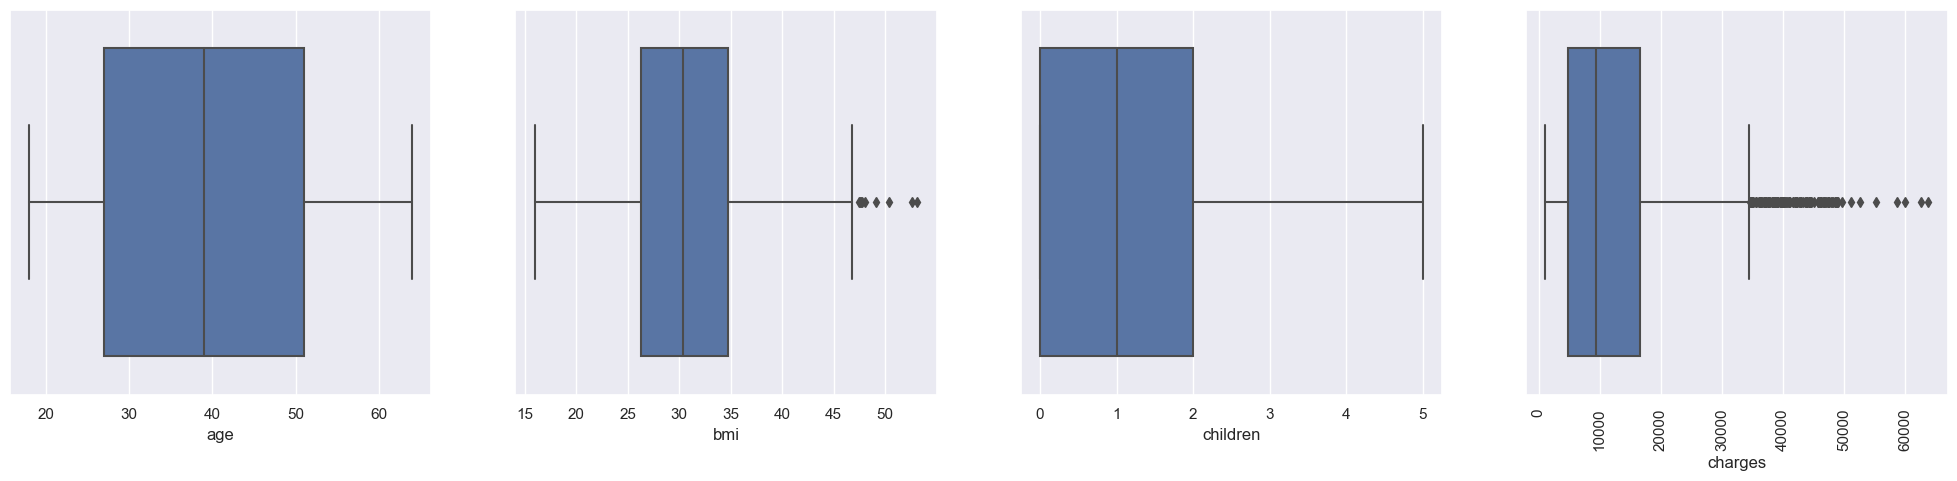

In [41]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 4, 1)
sns.boxplot(x="age" , data=df)
plt.subplot(1, 4, 2)
sns.boxplot(x="bmi" , data=df)
plt.subplot(1, 4, 3)
sns.boxplot(x="children" , data=df)
plt.subplot(1, 4, 4)
sns.boxplot(x="charges" , data=df)
plt.xticks(rotation=90)
plt.show()

#### Nhận xét:
- Dữ liệu có outlier => Dùng RobustScaler

In [42]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92
1,1,18,male,33.77,1,no,southeast,1725.55
2,2,28,male,33.00,3,no,southeast,4449.46
3,3,33,male,22.70,0,no,northwest,21984.47
4,4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.97,3,no,northwest,10600.55
1333,1334,18,female,31.92,0,no,northeast,2205.98
1334,1335,18,female,36.85,0,no,southeast,1629.83
1335,1336,21,female,25.80,0,no,southwest,2007.94


## Phần 3 : Feature Engineering

In [43]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [44]:
X

,index,age,sex,bmi,children,smoker,region
0,0,19,female,27.90,0,yes,southwest
1,1,18,male,33.77,1,no,southeast
2,2,28,male,33.00,3,no,southeast
3,3,33,male,22.70,0,no,northwest
4,4,32,male,28.88,0,no,northwest
...,...,...,...,...,...,...,...
1332,1333,50,male,30.97,3,no,northwest
1333,1334,18,female,31.92,0,no,northeast
1334,1335,18,female,36.85,0,no,southeast
1335,1336,21,female,25.80,0,no,southwest


In [45]:
y

0      16884.92
1       1725.55
2       4449.46
3      21984.47
4       3866.86
         ...   
1332   10600.55
1333    2205.98
1334    1629.83
1335    2007.94
1336   29141.36
Name: charges, Length: 1337, dtype: float64

### 3.1. Chuẩn hóa các biến phân loại input

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse=False, drop='first')

In [12]:
encoded_data = encoder.fit_transform(df[['sex', 'smoker','region']])
X_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=['sex', 'smoker','region']))
X_encoded

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,1.0


### 3.4. Chuẩn hóa các biến số input bằng RobustScaler

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
X_num_scaled = RobustScaler().fit_transform(df[['age', 'bmi', 'children']])

In [13]:
X = pd.concat([pd.DataFrame(X_num_scaled, columns=['age', 'bmi', 'children']), X_encoded], axis=1)

In [14]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297708,-0.5,0.0,1.0,0.0,0.0,1.0
1,-0.875000,0.401310,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.458333,0.309616,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.250000,-0.916344,-0.5,1.0,0.0,1.0,0.0,0.0
4,-0.291667,-0.181006,-0.5,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.458333,0.067877,1.0,1.0,0.0,1.0,0.0,0.0
1334,-0.875000,0.181006,-0.5,0.0,0.0,0.0,0.0,0.0
1335,-0.875000,0.768086,-0.5,0.0,0.0,0.0,1.0,0.0
1336,-0.750000,-0.547782,-0.5,0.0,0.0,0.0,0.0,1.0


## Phần 4 : Modeling & Evaluation/ Analyze & Report

## 4.1 Cross validation

In [10]:
# Choose multiple split sizes
split_sizes = [0.3, 0.25, 0.2, 0.15, 0.1]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [15]:
y=df.iloc[:,-1]

In [17]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297708,-0.5,0.0,1.0,0.0,0.0,1.0
1,-0.875000,0.401310,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.458333,0.309616,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.250000,-0.916344,-0.5,1.0,0.0,1.0,0.0,0.0
4,-0.291667,-0.181006,-0.5,1.0,0.0,1.0,0.0,0.0


In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [26]:
# Loop for each split_size and evaluate the model
for split_size in split_sizes:
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_size, random_state=42)
    
    # Create the model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    accuracy_train = model.score(X_train, y_train)
    accuracy_val = model.score(X_val, y_val)
    
    # Print the results
    print(f'Split size: {split_size}, Train accuracy: {accuracy_train * 100:.2f}%, Validation accuracy: {accuracy_val * 100:.2f}%')
    print('-' * 50)

Split size: 0.3, Train accuracy: 74.23%, Validation accuracy: 76.94%
--------------------------------------------------
Split size: 0.25, Train accuracy: 74.49%, Validation accuracy: 76.69%
--------------------------------------------------
Split size: 0.2, Train accuracy: 74.17%, Validation accuracy: 78.33%
--------------------------------------------------
Split size: 0.15, Train accuracy: 74.19%, Validation accuracy: 79.71%
--------------------------------------------------
Split size: 0.1, Train accuracy: 74.91%, Validation accuracy: 76.51%
--------------------------------------------------


In [27]:
# Improve the code above by running the model multiple times
cv = 10
print('Chạy ', cv, ' vòng lặp:')
for split_size in split_sizes:
    # Create a list of accuracies
    accuracies_train = []
    accuracies_val = []
    
    # Run the model cv times
    for i in range(cv):
        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_size, random_state=i)
        
        # Create the model
        model = LinearRegression()
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Evaluate the model
        accuracy_train = model.score(X_train, y_train)
        accuracy_val = model.score(X_val, y_val)
        
        # Append the results to the list
        accuracies_train.append(accuracy_train)
        accuracies_val.append(accuracy_val)
        
    # Calculate the mean of the list
    mean_accuracy_train = np.mean(accuracies_train)
    mean_accuracy_val = np.mean(accuracies_val)
    
    # Print the results
    print(f'Split size: {split_size}, Train accuracy: {mean_accuracy_train * 100:.2f}%, Validation accuracy: {mean_accuracy_val * 100:.2f}%')
    print('-' * 50)

Chạy  10  vòng lặp:
Split size: 0.3, Train accuracy: 74.84%, Validation accuracy: 75.34%
--------------------------------------------------
Split size: 0.25, Train accuracy: 74.95%, Validation accuracy: 75.22%
--------------------------------------------------
Split size: 0.2, Train accuracy: 74.83%, Validation accuracy: 75.69%
--------------------------------------------------
Split size: 0.15, Train accuracy: 75.05%, Validation accuracy: 74.77%
--------------------------------------------------
Split size: 0.1, Train accuracy: 74.99%, Validation accuracy: 74.93%
--------------------------------------------------


## 4.2 Model selection

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from time import time

In [19]:
import lightgbm as lgb

In [22]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
from sklearn.ensemble import VotingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

In [93]:
# Create a list of models
models = [
    ("Linear Regression", LinearRegression()),
    ("StackingRegressor", StackingRegressor(estimators=[('lr', RidgeCV()),('svr', LinearSVR(dual="auto", random_state=42))],
                                            final_estimator=RandomForestRegressor())),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ('RandomForest_100', RandomForestRegressor(n_estimators=100)),
    ('RandomForest_200', RandomForestRegressor(n_estimators=200)),
    ('RandomForest_300', RandomForestRegressor(n_estimators=300)),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Support Vector Machine", SVR(kernel = 'rbf')),
    ("Decision Tree", DecisionTreeRegressor()),
    ('LGBMRegressor', lgb.LGBMRegressor(verbosity=-1)),
    ('KNN_5', KNeighborsRegressor(n_neighbors=5)),
    ('KNN_7', KNeighborsRegressor(n_neighbors=7)),
    ('VotingRegressor', VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])),
]

In [25]:
from datetime import datetime

In [26]:
from sklearn.model_selection import cross_validate

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from datetime import datetime


In [94]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=["Model", "r2_scores", "r2_score_std", "MSE", "MAE", "Training_Time"])

# Loop through all the models and find the results
for name, model in models:
    # Start the clock
    start = datetime.now()
    
    # Perform cross-validation to get accuracy, MSE, and MAE
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    # Calculate the mean values
    mean_r2_scores = r2_scores.mean()
    r2_score_std = r2_scores.std()
    mean_mse = mse_scores.mean()
    mean_mae = mae_scores.mean()
    
    # End the clock
    end = datetime.now()
    training_time = (end - start).total_seconds()
    
    # Store the results in the DataFrame
    results = results.append({
        "Model": name,
        "r2_scores": mean_r2_scores,
        "r2_score_std": r2_score_std,
        "MSE": mean_mse,
        "MAE": mean_mae,
        "Training_Time": training_time
    }, ignore_index=True)

# Sort the results by accuracy
results = results.sort_values(by="r2_scores", ascending=False)

# Display the results
print(results)

                     Model  r2_scores  r2_score_std           MSE  \
7        Gradient Boosting   0.847009      0.035363  2.202497e+07   
10           LGBMRegressor   0.832462      0.035533  2.415939e+07   
6         RandomForest_300   0.828819      0.035218  2.477598e+07   
5         RandomForest_200   0.828752      0.035180  2.458580e+07   
4         RandomForest_100   0.827139      0.035133  2.515851e+07   
13         VotingRegressor   0.821899      0.041272  2.570539e+07   
11                   KNN_5   0.756590      0.031723  3.541763e+07   
12                   KNN_7   0.751241      0.036655  3.619203e+07   
2         Ridge Regression   0.738350      0.058595  3.761933e+07   
3         Lasso Regression   0.738251      0.059525  3.761878e+07   
0        Linear Regression   0.738232      0.059528  3.762148e+07   
1        StackingRegressor   0.716184      0.063151  4.059827e+07   
9            Decision Tree   0.677728      0.067549  4.584811e+07   
8   Support Vector Machine  -0.101

In [96]:
# Sort the results by accuracy
results = results.sort_values(by="r2_scores", ascending=False).reset_index(drop=True)

In [97]:
results

,Model,r2_scores,r2_score_std,MSE,MAE,Training_Time
0,Gradient Boosting,0.847009,0.035363,2.202497e+07,2606.792911,2.755219
1,LGBMRegressor,0.832462,0.035533,2.415939e+07,2917.014003,1.848659
2,RandomForest_300,0.828819,0.035218,2.477598e+07,2794.598037,35.799604
3,RandomForest_200,0.828752,0.035180,2.458580e+07,2791.909914,25.703536
4,RandomForest_100,0.827139,0.035133,2.515851e+07,2775.214125,11.389458
5,VotingRegressor,0.821899,0.041272,2.570539e+07,3214.862774,13.300268
6,KNN_5,0.756590,0.031723,3.541763e+07,3650.336941,0.337159
7,KNN_7,0.751241,0.036655,3.619203e+07,3673.201535,0.200184
8,Ridge Regression,0.738350,0.058595,3.761933e+07,4220.398901,0.057521
9,Lasso Regression,0.738251,0.059525,3.761878e+07,4210.263281,0.062553


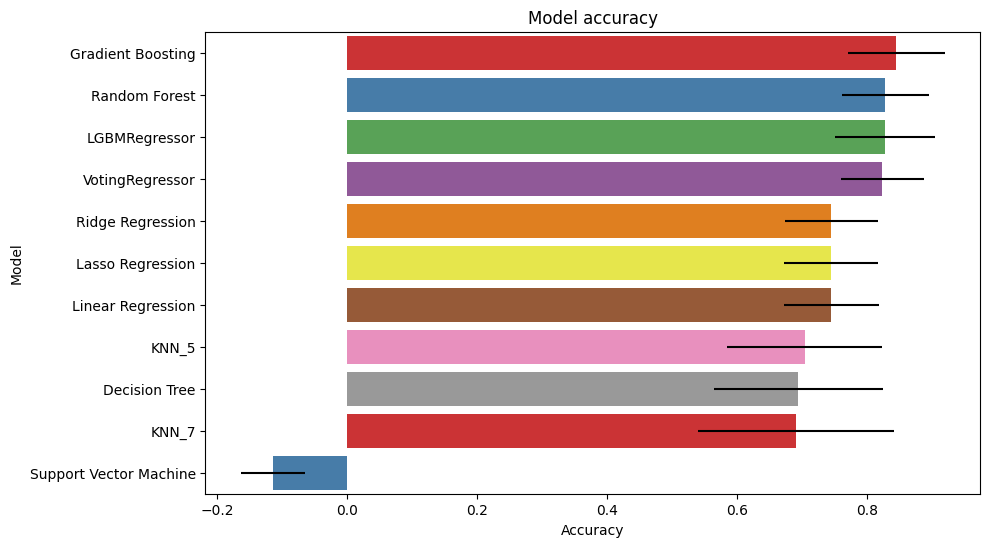

In [38]:
# Display the results using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='r2_scores', y='Model', data=results, palette='Set1', xerr=results['r2_score_std'] * 2, capsize=0.1)
plt.title('Model accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

In [39]:
# Display the results
results.style.background_gradient(cmap='Blues')

,Model,r2_scores,r2_score_std,MSE,MAE,Training_Time
0,Gradient Boosting,0.845368,0.037521,22558105.395339,2658.441208,2.120937
1,Random Forest,0.828062,0.033480,25006470.958738,2813.617026,8.502960
2,LGBMRegressor,0.827613,0.038574,25134877.372130,2960.581945,0.978265
3,VotingRegressor,0.823538,0.031976,25797141.243784,3296.158389,9.030841
4,Ridge Regression,0.745102,0.035826,37429674.604867,4227.777230,0.069520
5,Lasso Regression,0.745040,0.036347,37426918.558428,4213.031524,0.058045
6,Linear Regression,0.745031,0.036382,37428161.022356,4212.746728,0.075504
7,KNN_5,0.704499,0.059642,43675953.230833,4057.576177,0.136648
8,Decision Tree,0.693970,0.064991,46475593.071135,3163.917560,0.154659
9,KNN_7,0.691089,0.075532,45686127.403204,4120.775101,0.104680


### Conclusion

The Gradient Boosting has the highest r2 scores and low standard deviation. We decide to choose this as the base model for further hyper-parameter tuning.

In [40]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [42]:
# Create the hyper parameter grid based on the results of grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [43]:
# Start time
start_time = datetime.now()

# Run the grid search and measure the time
regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2) # n_jobs=-1 means using all processors, verbose=2 means printing out all the messages
grid_search.fit(X_train, y_train)

# End time
end_time = datetime.now()

# Print the time it took to run the grid search 
print('Time it took to run the grid search: {}'.format(end_time - start_time))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Time it took to run the grid search: 0:00:16.638092


In [44]:
# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Best score: 0.8514922752305514


In [45]:
# Get the best model
best_model = grid_search.best_estimator_

In [46]:
# Print the accuracy score
print(f'Accuracy score on the train set: {grid_search.score(X_train, y_train) * 100:.2f}%') 
print(f'Accuracy score on the test set: {grid_search.score(X_test, y_test) * 100:.2f}%')

Accuracy score on the train set: 88.57%
Accuracy score on the test set: 87.53%


### Random Search CV

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# Create the hyper parameter grid based on the results of grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [50]:
# Start time
start_time = datetime.now()

# Run the random search and measure the time
regressor = GradientBoostingRegressor()
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2) # n_jobs=-1 means using all processors, verbose=2 means printing out all the messages
random_search.fit(X_train, y_train)

# End time
end_time = datetime.now()

# Print the time it took to run the random search
print('Time it took to run the random search: {}'.format(end_time - start_time))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Time it took to run the random search: 0:00:08.837325


In [51]:
# Print the best parameters
print(f'Best parameters: {random_search.best_params_}, Best score: {random_search.best_score_}')    

Best parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}, Best score: 0.8515211158701799


In [52]:
# Get the best model
best_model = random_search.best_estimator_

In [63]:
# Print the accuracy score  
print(f'The full R-square is:: {best_model.score(X,y) * 100:.2f}%') 
print(f'The train R-square is: {best_model.score(X_train, y_train) * 100:.2f}%') 
print(f'The test R-square is: {best_model.score(X_test, y_test) * 100:.2f}%') 

The full R-square is:: 88.47%
The train R-square is: 88.57%
The test R-square is: 87.53%


In [64]:
y_pred = best_model.predict(X_test)  

In [65]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('The MSE of price and predicted value is: ', mse)
print('The MAE of price and predicted value is: ', mae)

The MSE of price and predicted value is:  17198879.06418246
The MAE of price and predicted value is:  2346.0884353428505


In [68]:
correlation_coefficient, p_value = pearsonr(y_pred, y_test)
alpha=0.05
print('correlation coefficient: ', correlation_coefficient)
print('p_value', p_value)

correlation coefficient:  0.9360570132300762
p_value 9.727506647088202e-62


H0: 2 biến độc lập; H1: 2 biến phụ thuộc

Hệ số tương quan: 0.94 ==> Tương quan mạnh và thuận (-1 ... 0 ... 1)

p-value: 0.00 ==> bác bỏ H0 và chấp nhận H1 (ngưỡng kiểm định alpha=0.05)

==> Có ý nghĩa thống kê (statistically significant): đúng cho quần thể (vì suy luận không do ngẫu nhiên khi lấy mẫu)

In [77]:
y.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [76]:
df_pred = df.copy()
df_pred['y_pred'] = best_model.predict(X)
df_pred.head()

,age,sex,bmi,children,smoker,region,charges,y_pred
0,19,female,27.900,0,yes,southwest,16884.92400,18397.023670
1,18,male,33.770,1,no,southeast,1725.55230,4451.446466
2,28,male,33.000,3,no,southeast,4449.46200,7160.360702
3,33,male,22.705,0,no,northwest,21984.47061,5827.635444
4,32,male,28.880,0,no,northwest,3866.85520,4684.425059


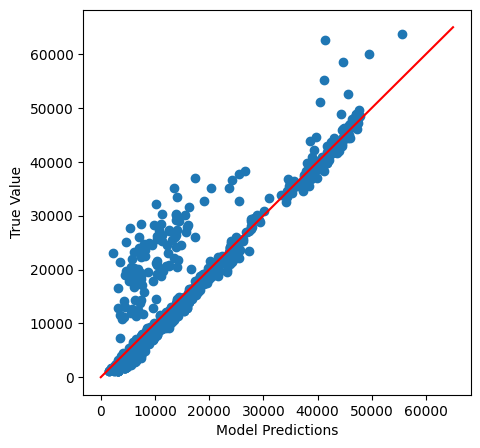

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(df_pred['y_pred'], df_pred['charges'])
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 65000], [0, 65000], '-', color = 'r')
plt.show()

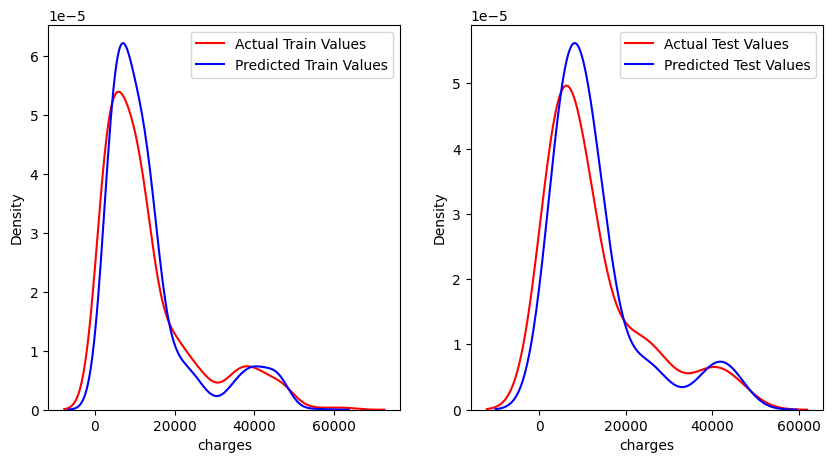

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(best_model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(best_model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)
plt.legend()
plt.show()

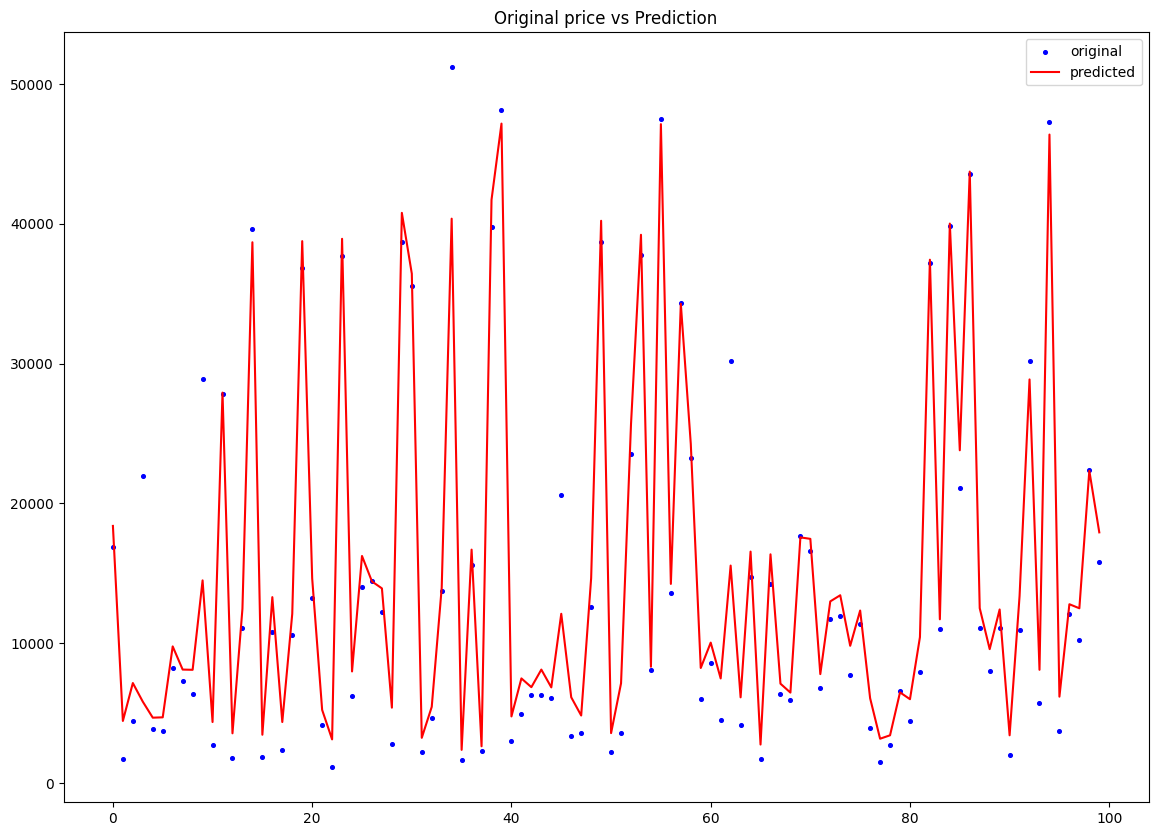

In [83]:
x_ax = range(len(df_pred['y_pred'].head(100)))
plt.figure(figsize=(14,10))
plt.title('Original price vs Prediction')
plt.scatter(x_ax, df_pred['charges'].head(100), s=7, color="blue", label="original")
plt.plot(x_ax, df_pred['y_pred'].head(100), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

## Model này cũng khá phù hợp với dữ liệu.